In [8]:
# ignore non material warnings
import warnings
warnings.filterwarnings("ignore")

In [9]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Contract Roll and Future Returns Calculations Manual

Terminology:

**Front Contract** - a contract that has the shortest time to expiry

**Back Contract** - a contract that has the second shortest time to expiry 

**Last Trading Day** - the date on which the contract will cease trading (exipration day, the last time when contract can be rollover without triggering delivery)

**How the roll is conducted and calculated?**

We take front contract, assume some number of contracts we enter at the beginning and then adjust it based on the roll in order to keep prices between contracts comparable when the roll occures.

Example:

|Time           |Front Contract     |Back Contract| No contracts | Contracts Value| Returns|
|---------------|-------------------|-------------|--------------|-----------------------|--------|
|T-1            |       90          |  95         | 1000         | 90 000                |  -     |
|Roll Day       |       100         |  110        | 1000 (front contracts sold) and 909.9 (back contracts bought)         | 100 000               |11%     |
|T+1            |       101         |  102.2      | 909.9| 91 899         | -8.11% |

Number of contracts calculation related to roll:
$$
\frac{100*1000}{110} = 909.9
$$

Retrun Calculation:

$$
\text{Ret}(T) = \frac{\text{Contract Value}(T)}{\text{Contract Value}(T-1)} - 1
$$



In [10]:
# Function to used to calculate roll and returns
def return_roll(settlement_price: float, last_trade_days,
                no_contracts: int, n_days_prior_to_roll: int,
                future_underlying: str):
        
        """
        Description:
        Function to calculate the roll and returns of a future contract.

        ----------
        Parameters:
        settlement_price : DataFrame containing the settlement prices of the future contract.

        last_trade_days : List containing the last trading days of the future contract.
            
        no_contracts : Number of contracts to roll.                    
            
        n_days_prior_to_roll : Number of days prior to the roll date.
            
        future_underlying : Name of the future underlying.

        -------
        Return:
        The function returns: DataFrame containing the rolled prices, number of contracts, notional values and notional returns.
        -------
        """
        
        number = 1
        contracts = no_contracts
        contracts_table = []
        rolled_prices = []
        notional_values = []

        for i in range(len(settlement_price)):
    
            # Record current position
            current_price = settlement_price.iloc[i, number-1]
            rolled_prices.append(current_price)
            contracts_table.append(contracts)
            notional_values.append(contracts * current_price)
            
            # 5 days before the last trading day
            if i + n_days_prior_to_roll + 1 < len(settlement_price) and settlement_price.index[i+n_days_prior_to_roll] == last_trade_days[number-1]:

                # Adjust contract quantity 
                new_price = settlement_price.iloc[i, number]
                contracts = (current_price * contracts) / new_price

                # Move!
                number += 1
        
        df = pd.DataFrame({
            "Date": settlement_price.index[:len(rolled_prices)],
            f"{future_underlying} Rolled Price": rolled_prices,
            f"{future_underlying} Number of Contracts": contracts_table,
            f"{future_underlying} Notional Value": notional_values
        })

        df[f"{future_underlying} Notional Return"] = df[f"{future_underlying} Notional Value"].pct_change()
        df.set_index("Date",inplace=True)

        return df.iloc[1:-1]

# COMEX Contracts

In [11]:
# Last Trading Day Data
#Gold
dates_matrix_gold = pd.read_excel("./Metals/Precious_Metals_Data.xlsx", sheet_name="Metadata Gold", skiprows=7)
last_trade_dates_gold = pd.to_datetime(dates_matrix_gold["Last Trade"])

#Silver
dates_matrix_silver = pd.read_excel("./Metals/Precious_Metals_Data.xlsx", sheet_name="Metadata Silver", skiprows=7)
last_trade_dates_silver = pd.to_datetime(dates_matrix_silver["Last Trade"])

In [12]:
# Gold
settlement_prices_gold = pd.read_excel("./Metals/Precious_Metals_Data.xlsx", sheet_name="GOLD PX_SETTLE")
settlement_prices_gold.set_index("Date",inplace=True)

# Silver
settlement_prices_silver = pd.read_excel("./Metals/Precious_Metals_Data.xlsx", sheet_name="SILVER PX_SETTLE")
settlement_prices_silver.set_index("Dates",inplace=True)

In [13]:
# Data Frames with rolled prices, number of contracts, notional values and notional returns

# Gold
df_gold = return_roll(settlement_prices_gold, last_trade_dates_gold, 1000, 3, "Gold")
# Silver
df_silver = return_roll(settlement_prices_silver, last_trade_dates_silver, 5000, 3, "Silver")

# Index Futures

In [14]:
# DAX Index (Germany)
dax = pd.read_excel("./Indices/GX1 Index.xlsx", sheet_name="PX_SETTLE")
dax.set_index("DATE", inplace=True)

# CAC40 Index (France)
cac40 = pd.read_excel("./Indices/CF1 Index.xlsx", sheet_name="PX_SETTLE")
cac40.set_index("DATE", inplace=True)

# FTSE/Athens Index (Greece)
ftse_athens = pd.read_excel("./Indices/AJ1 Index.xlsx", sheet_name="PX_SETTLE")
ftse_athens.set_index("DATE", inplace=True)

# Amsterdam Index (Netherlands)
amsterdam_index = pd.read_excel("./Indices/EO1 Index.xlsx", sheet_name="PX_SETTLE")
amsterdam_index.set_index("DATE", inplace=True)

# PSI-20 Index (Portugal)
psi_20 = pd.read_excel("./Indices/PP1 Index.xlsx", sheet_name="PX_SETTLE")
psi_20.set_index("DATE", inplace=True)

# IBEX-35 Index (Spain)
ibex_35 = pd.read_excel("./Indices/IB1 Index.xlsx", sheet_name="PX_SETTLE")
ibex_35.set_index("DATE", inplace=True)

# FTSE/MIB Index (Italy)
ftse_mib = pd.read_excel("./Indices/ST1 Index.xlsx", sheet_name="PX_SETTLE")
ftse_mib.set_index("DATE", inplace=True)

# BEL-20 Index (Belgium)
bel_20 = pd.read_excel("./Indices/BE1 Index.xlsx", sheet_name="PX_SETTLE")
bel_20.set_index("DATE", inplace=True)

In [15]:
# Last Trading Day Data

#dax
dates_matrix_dax = pd.read_excel("./Indices/Futures Calendars.xlsx", sheet_name="GX1 Index")
last_trade_dates_dax = pd.to_datetime(dates_matrix_dax["Last Trade"])

#cac40
dates_matrix_cac40 = pd.read_excel("./Indices/Futures Calendars.xlsx", sheet_name="CF1 Index")
last_trade_dates_cac40 = pd.to_datetime(dates_matrix_cac40["Last Trade"])

#ftse_athens
dates_matrix_ftse_athens = pd.read_excel("./Indices/Futures Calendars.xlsx", sheet_name="AJ1 Index")
last_trade_dates_ftse_athens = pd.to_datetime(dates_matrix_ftse_athens["Last Trade"])

#amsterdam_index
dates_matrix_amsterdam_index = pd.read_excel("./Indices/Futures Calendars.xlsx", sheet_name="EO1 Index")
last_trade_dates_amsterdam_index = pd.to_datetime(dates_matrix_amsterdam_index["Last Trade"])

#psi_20
dates_matrix_psi_20 = pd.read_excel("./Indices/Futures Calendars.xlsx", sheet_name="PP1 Index")
last_trade_dates_psi_20 = pd.to_datetime(dates_matrix_psi_20["Last Trade"])

#ibex_35
dates_matrix_ibex_35 = pd.read_excel("./Indices/Futures Calendars.xlsx", sheet_name="IB1 Index")
last_trade_dates_ibex_35 = pd.to_datetime(dates_matrix_ibex_35["Last Trade"])

#ftse_mib
dates_matrix_ftse_mib = pd.read_excel("./Indices/Futures Calendars.xlsx", sheet_name="ST1 Index")
last_trade_dates_ftse_mib = pd.to_datetime(dates_matrix_ftse_mib["Last Trade"])

#bel_20
dates_matrix_bel_20 = pd.read_excel("./Indices/Futures Calendars.xlsx", sheet_name="BE1 Index")
last_trade_dates_bel_20 = pd.to_datetime(dates_matrix_bel_20["Last Trade"])

In [16]:
# Data Frames with rolled prices, number of contracts, notional values and notional returns
# DAX
df_dax = return_roll(dax, last_trade_dates_dax, 1000, 3, "DAX")

# CAC40
df_cac40 = return_roll(cac40, last_trade_dates_cac40, 1000, 3, "CAC40")

# Amsterdam Index
df_amsterdam_index = return_roll(amsterdam_index, last_trade_dates_amsterdam_index, 1000, 3, "Amsterdam Index")

# PSI-20
df_psi_20 = return_roll(psi_20, last_trade_dates_psi_20, 1000, 3, "PSI-20")

# IBEX-35
df_ibex_35 = return_roll(ibex_35, last_trade_dates_ibex_35, 1000, 3, "IBEX-35")

# FTSE/MIB
df_ftse_mib = return_roll(ftse_mib, last_trade_dates_ftse_mib, 1000, 3, "FTSE/MIB")

#FTSE/Athens
df_ftse_athens = return_roll(ftse_athens, last_trade_dates_ftse_athens, 1000, 3, "FTSE/Athens")

# BEL-20
df_bel_20 = return_roll(bel_20, last_trade_dates_bel_20, 1000, 3, "BEL-20")

# Visual Check of Data

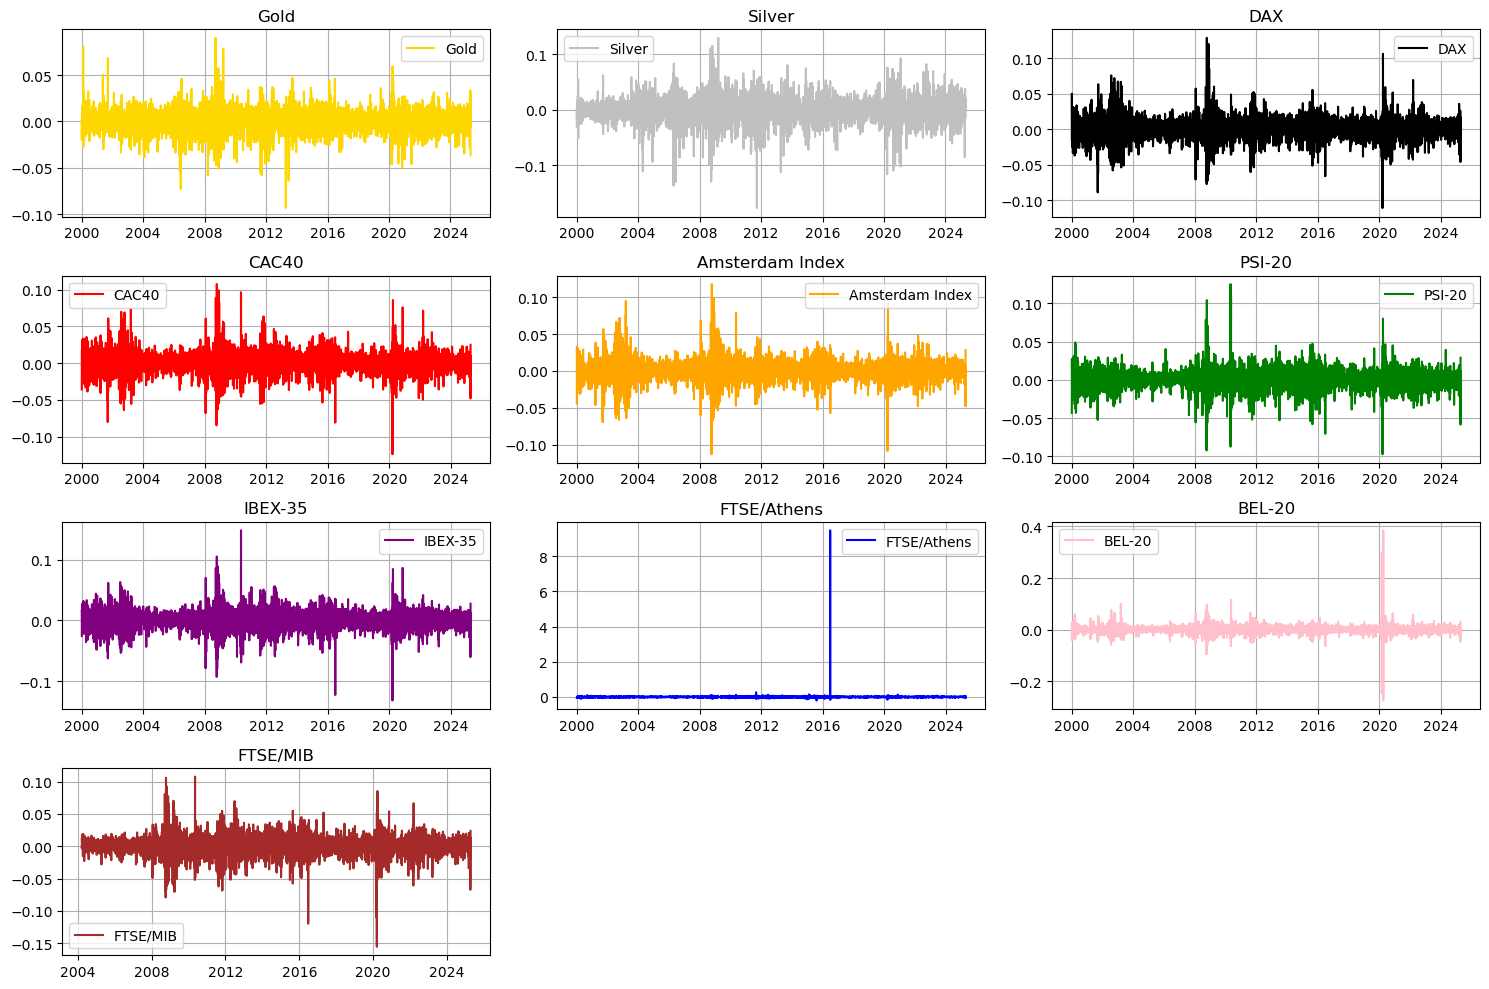

In [17]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4, 3, figsize=(15, 10))

# First row
axes[0, 0].plot(df_gold["Gold Notional Return"], label="Gold", color="gold")
axes[0, 0].set_title("Gold")
axes[0, 0].legend()
axes[0, 0].grid(True)

axes[0, 1].plot(df_silver["Silver Notional Return"], label="Silver", color="silver")
axes[0, 1].set_title("Silver")
axes[0, 1].legend()
axes[0, 1].grid(True)

axes[0, 2].plot(df_dax["DAX Notional Return"], label="DAX", color="black")
axes[0, 2].set_title("DAX")
axes[0, 2].legend()
axes[0, 2].grid(True)

# Second row
axes[1, 0].plot(df_cac40["CAC40 Notional Return"], label="CAC40", color="red")
axes[1, 0].set_title("CAC40")
axes[1, 0].legend()
axes[1, 0].grid(True)

axes[1, 1].plot(df_amsterdam_index["Amsterdam Index Notional Return"], label="Amsterdam Index", color="orange")
axes[1, 1].set_title("Amsterdam Index")
axes[1, 1].legend()
axes[1, 1].grid(True)

axes[1, 2].plot(df_psi_20["PSI-20 Notional Return"], label="PSI-20", color="green")
axes[1, 2].set_title("PSI-20")
axes[1, 2].legend()
axes[1, 2].grid(True)

# Third row
axes[2, 0].plot(df_ibex_35["IBEX-35 Notional Return"], label="IBEX-35", color="purple")
axes[2, 0].set_title("IBEX-35")
axes[2, 0].legend()
axes[2, 0].grid(True)

axes[2, 1].plot(df_ftse_athens["FTSE/Athens Notional Return"], label="FTSE/Athens", color="blue")
axes[2, 1].set_title("FTSE/Athens")
axes[2, 1].legend()
axes[2, 1].grid(True)

axes[2, 2].plot(df_bel_20["BEL-20 Notional Return"], label="BEL-20", color="pink")
axes[2, 2].set_title("BEL-20")
axes[2, 2].legend()
axes[2, 2].grid(True)

# Fourth row
axes[3, 0].plot(df_ftse_mib["FTSE/MIB Notional Return"], label="FTSE/MIB", color="brown")
axes[3, 0].set_title("FTSE/MIB")
axes[3, 0].legend()
axes[3, 0].grid(True)
axes[3, 1].axis('off')  # Empty space
axes[3, 2].axis('off')  # Empty space


plt.tight_layout()
plt.show()


In [18]:
# Should we adjust Greece
df_ftse_athens["FTSE/Athens Notional Return"].idxmax()

Timestamp('2016-06-21 00:00:00')

# Final Results

In [31]:
# Final Results !

# Join two DataFrames with concat]
df_final_returns = pd.concat([df_dax["DAX Notional Return"], df_amsterdam_index["Amsterdam Index Notional Return"],
                      df_cac40["CAC40 Notional Return"], df_psi_20["PSI-20 Notional Return"],
                      df_ibex_35["IBEX-35 Notional Return"], df_ftse_athens["FTSE/Athens Notional Return"],
                      df_bel_20["BEL-20 Notional Return"], df_ftse_mib["FTSE/MIB Notional Return"], df_gold["Gold Notional Return"],
                        df_silver["Silver Notional Return"]
                      ], axis=1)

df_final_notional = pd.concat([df_dax["DAX Notional Value"], df_amsterdam_index["Amsterdam Index Notional Value"],
                      df_cac40["CAC40 Notional Value"], df_psi_20["PSI-20 Notional Value"],
                      df_ibex_35["IBEX-35 Notional Value"], df_ftse_athens["FTSE/Athens Notional Value"],
                      df_bel_20["BEL-20 Notional Value"], df_ftse_mib["FTSE/MIB Notional Value"], df_gold["Gold Notional Value"],
                        df_silver["Silver Notional Value"]
                      ], axis=1)


In [32]:
# Thats all data we have
df_final_returns = df_final_returns.loc[(df_final_returns.index >= pd.to_datetime('2004-04-22')) & (df_final_returns.index <= pd.to_datetime('2025-04-07'))]
df_final_notional = df_final_notional.loc[(df_final_notional.index >= pd.to_datetime('2004-04-22')) & (df_final_notional.index <= pd.to_datetime('2025-04-07'))]

In [33]:
# If you want to save the data !
df_final_returns.to_csv("Final_Returns_Data.csv")
df_final_notional.to_csv("Final_Notional_Data.csv")